Task 1: The following code utilizes the Levenshtein distance algorithm to implement fuzzy string matching for students' career aspirations, aligning them with standardized career names. Data imported from an Excel sheet via the Pandas library is structured as a list, enabling subsequent plotting of aspiration frequencies against career names using Pyplot.

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
df = pd.read_excel('TaskData.xlsx', header=None)
column_list = df.iloc[:, 0].tolist()  # Accessing the first column
data = [element.upper() for element in column_list]
#print(data) #To display the list

['COKTER', 'DENTIISTS', 'ENGINIR', 'POLICE', 'ENGNEIEAR', 'DOCTRO', 'DENTISTS', 'POLICE', 'ENJEINEAAR', 'DENTISTT', 'NUSYE', 'TEACHER', 'DOCKTOR', 'NUSRE', 'ARCHITEFT', 'TEACHER', 'ENGEINEER', 'DENTISTS', 'POLICE', 'ENJINEER', 'ENGENIIAR', 'ENGINEAR', 'ACCOUNTANT', 'TEACHER', 'POLICE', 'DENSTISTS', 'PHARMACCIST', 'DOKTUR', 'POLICE', 'DEIST', 'DOCTUOR', 'DENTISTS', 'DOKTOOR', 'DENISST', 'DOCTORE', 'LAWYREE', 'DENTTST', 'DACTAR', 'DOCTUER', 'TEACHER', 'TEACHER', 'DOKTR', 'DOCTAR', 'POLICE', 'TEACHER', 'ENJINEAR', 'TEACHER', 'ENJNEEAR', 'TEACHER', 'ARCHITEKCT', 'ENGINEER', 'PHARMASICT', 'POLICE', 'ENJENEER', 'DENIST', 'NUSRQE', 'ACCOUNTANT', 'DENTSISTS', 'TEACHER', 'POLICE', 'DOCTARA', 'ARKHITECT', 'ENJEENEEAR', 'ARCHATEKT', 'DACTUR', 'LAWYER', 'ENGINNIR', 'DENSTIST', 'TEACHER', 'ENJEENEER', 'ENJINEEER', 'POLICE', 'TEACHER', 'ARCHITET', 'LAWYR', 'ENJEENIR', 'ACCOUNTANT', 'TEACHER', 'ENGENIER', 'POLICE', 'ENGIEEAR', 'POLICE', 'TEACHER', 'POLICE', 'ENJEINEER', 'TEACHER', 'ENGUNIR', 'NUSXE',

In [10]:
career_options = {
    "DOCTOR": "Doctor",
    "LAWYER": "Lawyer",
    "TEACHER": "Teacher",
    "ENGINEER": "Engineer",
    "ACCOUNTANT": "Accountant",
    "NURSE": "Nurse",
    "POLICE": "Police",
    "ARCHITECT": "Architect",
    "DENTIST": "Dentist",
    "PHARMACIST": "Pharmacist",
}

career_aspirations = {}

In [11]:
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

In [12]:
def find_closest_match(word, options):
    min_distance = float('inf')
    closest_match = word
    for option in options:
        distance = levenshtein_distance(word.upper(), option)
        if distance < min_distance:
            min_distance = distance
            closest_match = options[option]
    return closest_match

def correct_spelling(word):
    return find_closest_match(word, career_options)

def process_data(data):
    for response in data:
        career = correct_spelling(response)
        if career in career_aspirations:
            career_aspirations[career] += 1
        else:
            career_aspirations[career] = 1

In [13]:
def plot_career_aspirations():
    plt.figure(figsize=(10, 6))
    plt.bar(career_aspirations.keys(), career_aspirations.values())
    plt.xlabel("Career (Name)")
    plt.ylabel("Frequency (No. of Students)")
    plt.title("PLOT OF CAREER ASPIRATIONS")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

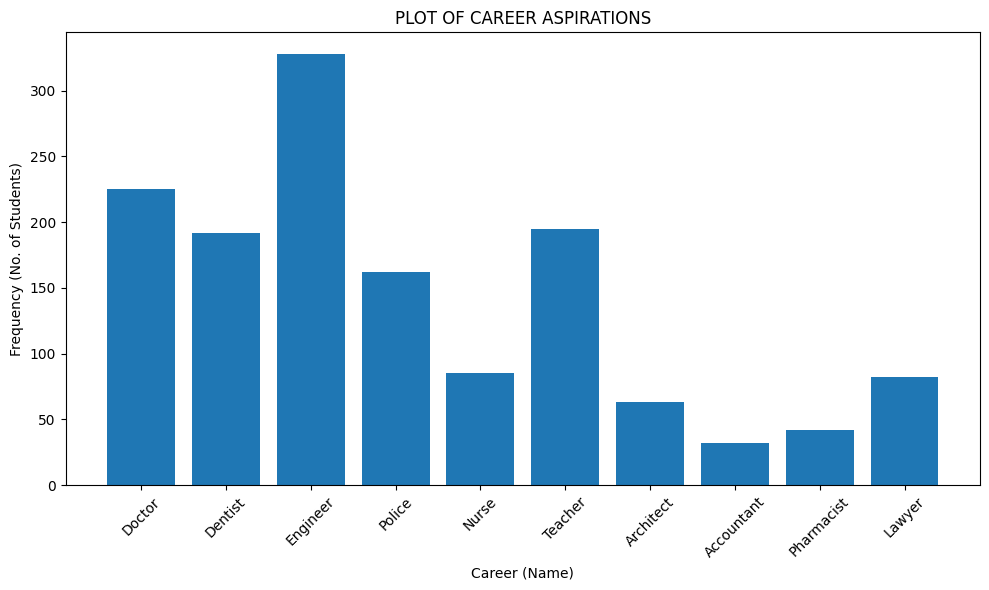

In [14]:
process_data(data)
plot_career_aspirations()